<a href="https://colab.research.google.com/github/meriemdouider1/mois1-mois2/blob/main/modelisation%20app/test%20(k_mens%205groupes%2011%2010fev).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.metrics import recall_score


In [2]:
Cl = '/content/AXEAPP.xlsx' 
apprentissage= pd.read_excel(Cl, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [3]:
apprentissage

,Cs_longia,AXE11,AXE12,AXE2,AXE3,AXE4,AXE5
0,1,0.001424,0.031177,-0.059472,-3.681616,-2.401045,-0.173420
1,1,0.001859,0.007034,-0.032365,-0.780750,-0.885475,-0.161534
2,1,0.001859,0.007034,-0.032365,-0.780750,-0.885475,-0.161534
3,0,-0.001565,0.007444,0.052511,-0.575102,-0.089102,-0.036805
4,0,-0.001238,0.010596,0.047796,-1.674400,0.216223,0.038151
...,...,...,...,...,...,...,...
198,1,0.002694,-0.011021,-0.107134,-1.678789,-0.626739,-0.093039
199,1,0.001341,-0.016060,-0.078564,-1.584375,0.421137,-0.297170
200,1,0.001998,-0.013530,-0.123163,-1.309588,-0.722200,-0.279362
201,1,-0.000923,-0.014214,0.010676,-1.404706,1.443951,0.121188


In [4]:
Cl2 = '/content/AXETEST.xlsx' 
test= pd.read_excel(Cl2, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [5]:
test

,Cs_longia,AXE11,AXE12,AXE2,AXE3,AXE4,AXE5
0,0,-0.001640,0.011923,0.102308,-1.801407,-0.832450,0.062173
1,1,-0.005890,0.007865,0.008081,-1.369971,-0.792410,-0.012560
2,1,-0.005890,0.007865,0.008081,-1.369971,-0.792410,-0.012560
3,1,0.000629,0.013577,-0.077555,-2.480820,-0.756910,-0.121500
4,0,-0.002810,0.005402,0.016373,-0.059747,0.577835,0.278006
5,0,-0.002760,0.005402,0.021959,-0.262708,0.577835,0.273379
6,0,-0.000010,0.006071,0.030925,0.381259,-0.687890,-0.080940
7,0,0.001179,0.004634,-0.022492,0.806717,-0.719120,0.224582
8,1,-0.002400,0.006000,0.109514,0.845323,1.029173,0.228331
9,0,-0.001750,0.005932,0.090288,0.493467,1.097954,0.133737


In [6]:
X_app = apprentissage.loc[:, apprentissage.columns != 'Cs_longia']
Y_app = apprentissage.Cs_longia
X_test = test.loc[:, test.columns != 'Cs_longia']
Y_test = test.Cs_longia

# XGBOOST

In [7]:
Classifier = XGBClassifier(scale_pos_weight=1,learning_rate=0.5,max_depth=5,n_estimators=150,objective="binary:logistic")

In [8]:
Classifier.fit(X_app,Y_app)

XGBClassifier(learning_rate=0.5, max_depth=5, n_estimators=150)

In [9]:
preds = Classifier.predict(X_test)

In [10]:
preds

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0])

In [11]:
cf_matrix = confusion_matrix(Y_test, preds)
print(cf_matrix)

[[23  8]
 [ 9 11]]


In [12]:
###Recall
def recall(y_test, preds):
  recall=recall_score(y_test, preds)
  return recall
def MCC(y_test, preds):
  MCC= matthews_corrcoef(y_test, preds) 
  return MCC
### MCC
def MCC(y_test, preds):
  MCC= matthews_corrcoef(y_test, preds) 
  return MCC
### sensibilite
def sensibilite(y_test, preds):
  cf_matrix = confusion_matrix(y_test, preds)
  sensibilite =  (cf_matrix[1,1])/(cf_matrix[1,1]+cf_matrix[1,0])
  return sensibilite
### specifite 
def specifite(y_test, preds):
  cf_matrix = confusion_matrix(y_test, preds)
  specifite =  (cf_matrix[0,0])/(cf_matrix[0,0]+cf_matrix[0,1])
  return specifite 
### kappa
def kappa(y_test, preds):
  value = cohen_kappa_score(y_test, preds)
  return value
### balancedacc
def balancedacc(y_test, preds):
  cf_matrix = confusion_matrix(y_test, preds)
  sen = (cf_matrix[1,1])/(cf_matrix[1,1]+cf_matrix[0,1])
  spe = (cf_matrix[0,0])/(cf_matrix[0,0]+cf_matrix[1,0])
  value = (sen + spe)/2
  return value
def présicion_positive(y_test, preds):
  cf_matrix = confusion_matrix(y_test, preds)
  pre_pos =  (cf_matrix[1,1])/(cf_matrix[1,1]+cf_matrix[0,1])
  return pre_pos
def présicion_négative(y_test, preds):
  cf_matrix = confusion_matrix(y_test, preds)
  pre_pos =  (cf_matrix[0,0])/(cf_matrix[0,0]+cf_matrix[1,0])
  return pre_pos
  
### courbe roc
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

In [13]:
MCC(Y_test, preds)

0.29480234954476486

In [14]:
recall(Y_test, preds)

0.55

In [15]:
sensibilite(Y_test, preds)

0.55

In [16]:
specifite(Y_test, preds)

0.7419354838709677

In [17]:
présicion_négative(Y_test, preds)

0.71875

In [18]:
présicion_positive(Y_test, preds)

0.5789473684210527

In [19]:
balancedacc(Y_test, preds)

0.6488486842105263

In [20]:
kappa(Y_test, preds)

0.29454841334418225

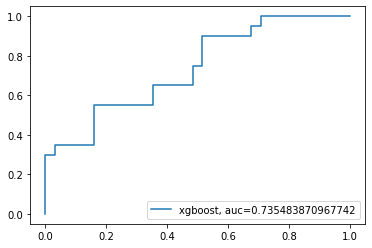

In [21]:
y_pred_proba = Classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="xgboost, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Logistic

In [22]:
Classifier1 = LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced')

In [23]:
Classifier1.fit(X_app,Y_app)

LogisticRegression(class_weight='balanced')

In [24]:
preds1 = Classifier1.predict(X_test)

In [25]:
preds1

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1])

In [26]:
cf_matrix1 = confusion_matrix(Y_test, preds1)
print(cf_matrix1)

[[23  8]
 [ 7 13]]


In [27]:
MCC(Y_test, preds1)

0.38881244219722866

In [28]:
recall(Y_test, preds1)

0.65

In [29]:
sensibilite(Y_test, preds1)

0.65

In [30]:
specifite(Y_test, preds1)

0.7419354838709677

In [31]:
présicion_négative(Y_test, preds1)

0.7666666666666667

In [32]:
présicion_positive(Y_test, preds1)

0.6190476190476191

In [33]:
balancedacc(Y_test, preds1)

0.6928571428571428

In [34]:
kappa(Y_test, preds1)

0.38848920863309355

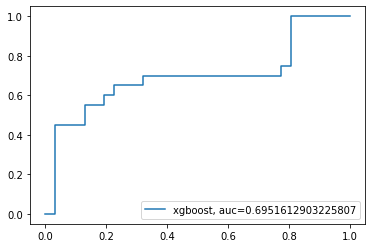

In [35]:
y_pred_proba = Classifier1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="xgboost, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Random_forest

In [36]:
Classifier2 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5 ,min_samples_split=3)

In [37]:
Classifier2.fit(X_app,Y_app)

RandomForestClassifier(max_depth=5, min_samples_split=3)

In [38]:
preds2 = Classifier2.predict(X_test)

In [39]:
preds2

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0])

In [40]:
cf_matrix2 = confusion_matrix(Y_test, preds2)
print(cf_matrix2)

[[20 11]
 [ 9 11]]


In [41]:
MCC(Y_test, preds2)

0.1923885343897275

In [42]:
recall(Y_test, preds2)

0.55

In [43]:
sensibilite(Y_test, preds2)

0.55

In [44]:
specifite(Y_test, preds2)

0.6451612903225806

In [45]:
présicion_négative(Y_test, preds2)

0.6896551724137931

In [46]:
présicion_positive(Y_test, preds2)

0.5

In [47]:
balancedacc(Y_test, preds2)

0.5948275862068966

In [48]:
kappa(Y_test, preds2)

0.19175911251980982

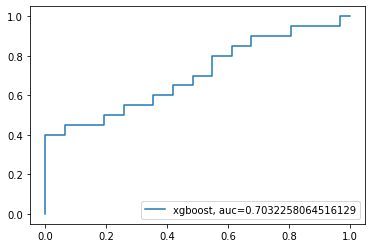

In [49]:
y_pred_proba = Classifier2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="xgboost, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Gradient_Boostnig

In [50]:
Classifier3 = GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 )

In [51]:
Classifier3.fit(X_app,Y_app)

GradientBoostingClassifier(max_depth=2, max_features=2, min_samples_leaf=2,
                           n_estimators=225, random_state=0, subsample=1)

In [52]:
preds3 = Classifier3.predict(X_test)

In [53]:
preds3

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0])

In [54]:
cf_matrix3 = confusion_matrix(Y_test, preds3)
print(cf_matrix3)

[[23  8]
 [ 9 11]]


In [55]:
MCC(Y_test, preds3)

0.29480234954476486

In [56]:
recall(Y_test, preds3)

0.55

In [57]:
sensibilite(Y_test, preds3)

0.55

In [58]:
specifite(Y_test, preds3)

0.7419354838709677

In [59]:
présicion_négative(Y_test, preds3)

0.71875

In [60]:
présicion_positive(Y_test, preds3)

0.5789473684210527

In [61]:
balancedacc(Y_test, preds3)

0.6488486842105263

In [62]:
kappa(Y_test, preds3)

0.29454841334418225

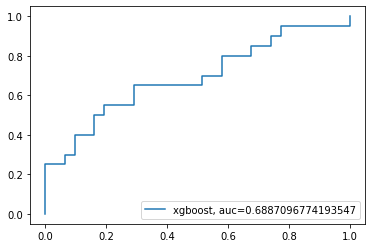

In [63]:
y_pred_proba = Classifier3.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="xgboost, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Gaussian

In [64]:
Classifier4 = GaussianNB()

In [65]:
Classifier4.fit(X_app,Y_app)

GaussianNB()

In [66]:
preds4 = Classifier4.predict(X_test)

In [67]:
preds4

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0])

In [68]:
cf_matrix4 = confusion_matrix(Y_test, preds4)
print(cf_matrix4)

[[21 10]
 [10 10]]


In [69]:
MCC(Y_test, preds4)

0.1774193548387097

In [70]:
recall(Y_test, preds4)

0.5

In [71]:
sensibilite(Y_test, preds4)

0.5

In [72]:
specifite(Y_test, preds4)

0.6774193548387096

In [73]:
présicion_négative(Y_test, preds4)

0.6774193548387096

In [74]:
présicion_positive(Y_test, preds4)

0.5

In [75]:
balancedacc(Y_test, preds4)

0.5887096774193548

In [76]:
kappa(Y_test, preds4)

0.17741935483870963

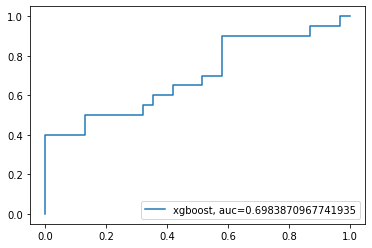

In [77]:
y_pred_proba = Classifier4.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="xgboost, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# KNN

In [78]:
Classifier5 = KNeighborsClassifier(n_neighbors=6)

In [79]:
Classifier5.fit(X_app,Y_app)

KNeighborsClassifier(n_neighbors=6)

In [80]:
preds5 = Classifier5.predict(X_test)

In [81]:
preds5

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1])

In [82]:
cf_matrix5 = confusion_matrix(Y_test, preds5)
print(cf_matrix5)

[[22  9]
 [ 8 12]]


In [83]:
MCC(Y_test, preds5)

0.30720983087188436

In [84]:
recall(Y_test, preds5)

0.6

In [85]:
sensibilite(Y_test, preds5)

0.6

In [86]:
specifite(Y_test, preds5)

0.7096774193548387

In [87]:
présicion_négative(Y_test, preds5)

0.7333333333333333

In [88]:
présicion_positive(Y_test, preds5)

0.5714285714285714

In [89]:
balancedacc(Y_test, preds5)

0.6523809523809523

In [90]:
kappa(Y_test, preds5)

0.3069544364508394

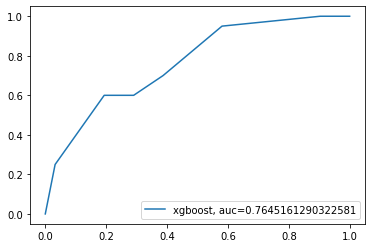

In [91]:
y_pred_proba = Classifier5.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="xgboost, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# MLPC

In [93]:
from sklearn.neural_network import MLPClassifier

In [94]:
Classifier6 = MLPClassifier(hidden_layer_sizes=100,max_iter=300)

In [95]:
Classifier6.fit(X_app,Y_app)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=100, max_iter=300)

In [96]:
preds6 = Classifier6.predict(X_test)

In [97]:
preds6

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1])

In [98]:
cf_matrix6 = confusion_matrix(Y_test, preds6)
print(cf_matrix6)

[[25  6]
 [ 8 12]]


In [99]:
MCC(Y_test, preds6)

0.41525175206771603

In [100]:
recall(Y_test, preds6)

0.6

In [101]:
sensibilite(Y_test, preds6)

0.6

In [102]:
specifite(Y_test, preds6)

0.8064516129032258

In [103]:
présicion_négative(Y_test, preds6)

0.7575757575757576

In [104]:
présicion_positive(Y_test, preds6)

0.6666666666666666

In [105]:
balancedacc(Y_test, preds6)

0.7121212121212122

In [106]:
kappa(Y_test, preds6)

0.4137931034482759

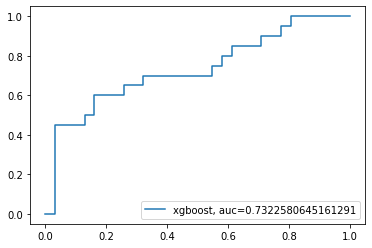

In [107]:
y_pred_proba = Classifier6.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="xgboost, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# SVM

In [108]:
Classifier7 = svm.SVC(kernel='rbf',gamma=0.05,C=12)

In [109]:
Classifier7.fit(X_app,Y_app)

SVC(C=12, gamma=0.05)

In [110]:
preds7 = Classifier7.predict(X_test)

In [111]:
preds7

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1])

In [112]:
cf_matrix7 = confusion_matrix(Y_test, preds7)
print(cf_matrix7)

[[23  8]
 [ 8 12]]


In [113]:
MCC(Y_test, preds7)

0.3419354838709677

In [114]:
recall(Y_test, preds7)

0.6

In [115]:
sensibilite(Y_test, preds7)

0.6

In [ ]:
specifite(Y_test, preds7)

In [117]:
présicion_négative(Y_test, preds7)

0.7419354838709677

In [118]:
présicion_positive(Y_test, preds7)

0.6

In [119]:
balancedacc(Y_test, preds7)

0.6709677419354838

In [120]:
kappa(Y_test, preds7)

0.3419354838709677

In [121]:
from sklearn.metrics import roc_auc_score

In [122]:
roc_auc_score(Y_test, Classifier7.decision_function(X_test))

0.7193548387096774